In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train=X_train/255
X_test=X_test/255

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

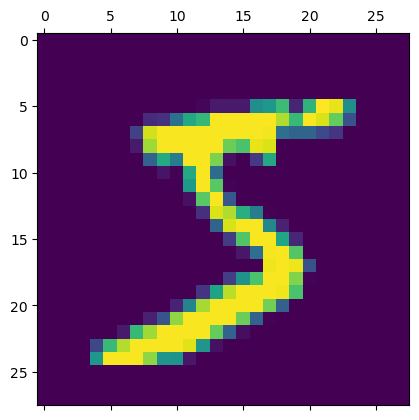

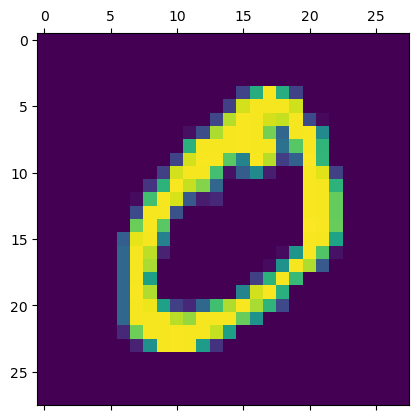

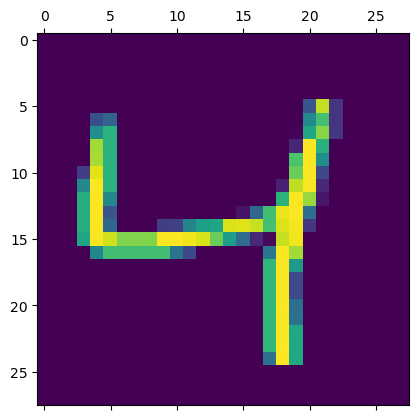

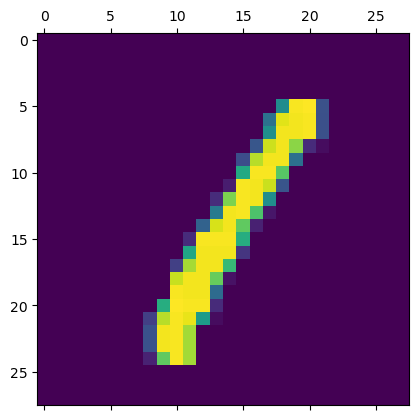

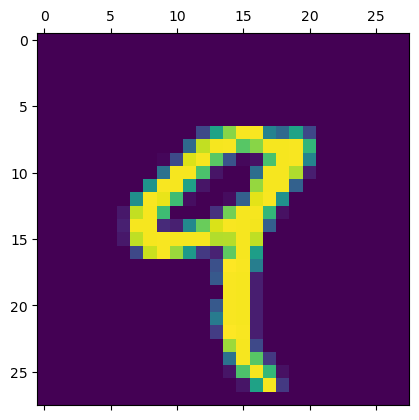

In [8]:
for i in range(5):
    plt.matshow(X_train[i])

In [9]:
#shape is default from keras
X_train.shape

(60000, 28, 28)

In [10]:
#changing the layer shape
X_train_flattern=X_train.reshape(len(X_train),28*28)

X_test_flattern=X_test.reshape(len(X_test),28*28)


In [11]:
X_train_flattern.shape

(60000, 784)

In [12]:
X_test_flattern.shape

(10000, 784)

In [13]:
X_train_flattern[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

model.fit(X_train_flattern,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4678 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3032 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9261


In [15]:
model.evaluate(X_test_flattern,y_test)

313/313 [==============================] - 0s 828us/step - loss: 0.2656 - accuracy: 0.9258


[0.26564842462539673, 0.9258000254631042]

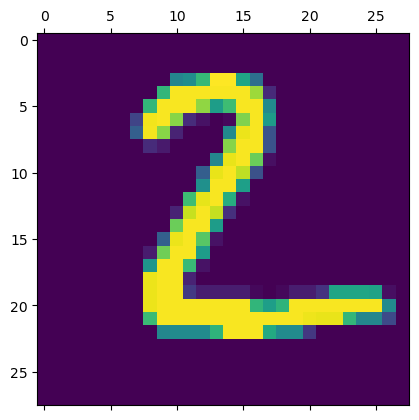

In [19]:
plt.matshow(X_test[1])

In [20]:
y_predicted=model.predict(X_test_flattern)
y_predicted[1]

313/313 [==============================] - 0s 843us/step


array([2.7694654e-01, 6.5228329e-03, 9.9919510e-01, 3.9377025e-01,
       1.0808179e-09, 8.7345302e-01, 8.7692821e-01, 7.8056273e-13,
       1.6291372e-01, 2.1697164e-09], dtype=float32)

In [21]:
np.argmax(y_predicted[1])

2

In [33]:
def prediction(i):
    plt.matshow(X_test[i])
    print(y_predicted[i])
    print('number is :- ',np.argmax(y_predicted[i]))   

[2.5186792e-03 3.9064371e-10 7.4989283e-01 9.9921763e-01 2.5861105e-08
 4.2759815e-01 3.5473472e-06 8.2370893e-10 5.5236898e-02 1.8123812e-06]
number is :-  3


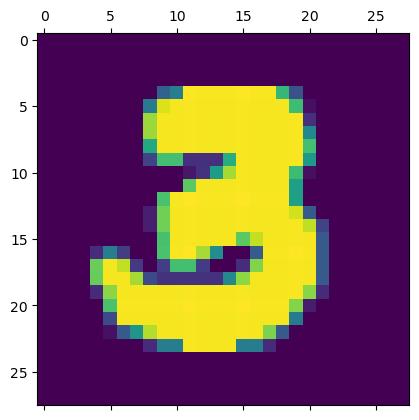

In [34]:
prediction(200)

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    6,    2,    1,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,   10,  917,   16,   12,    6,   11,   10,   42,    3],
       [   2,    0,   15,  921,    1,   27,    1,   11,   26,    6],
       [   2,    1,    3,    1,  927,    0,    7,    3,    9,   29],
       [   7,    1,    3,   33,   11,  782,   12,    4,   32,    7],
       [  10,    3,    9,    1,    8,   18,  903,    2,    4,    0],
       [   1,    6,   20,   10,    8,    0,    0,  947,    4,   32],
       [   7,    6,    5,   21,    9,   27,    8,   10,  872,    9],
       [  10,    7,    1,   10,   35,    7,    0,   20,    5,  914]])>

Text(95.72222222222221, 0.5, 'Actual')

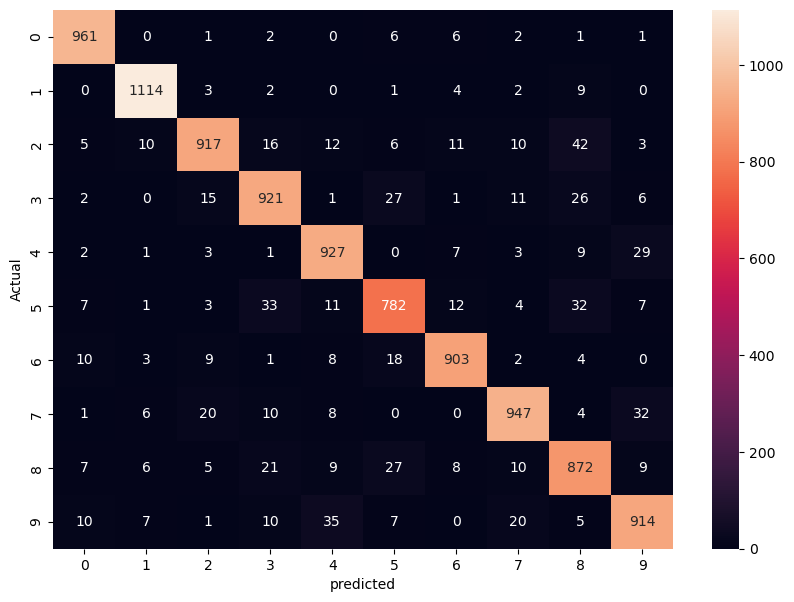

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')

In [52]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

model.fit(X_train_flattern,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2761 - accuracy: 0.9200
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9833


In [48]:
model.evaluate(X_test_flattern,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9764


[0.07891955971717834, 0.9764000177383423]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Actual')

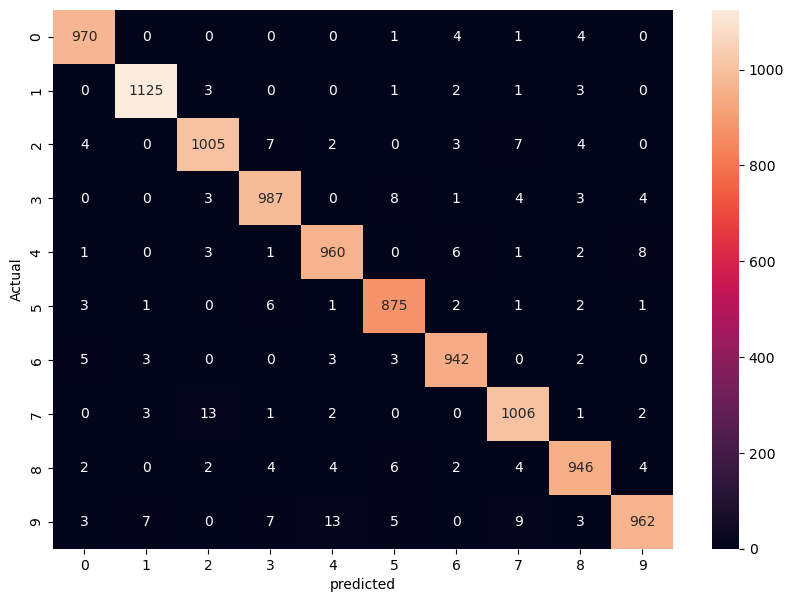

In [43]:
y_predicted=model.predict(X_test_flattern)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')